# Introdução à Inteligência Artificial
## Prova 2
### Joás de Brito Ferreira Filho 

Curso: `Estatística`

Matrícula: `202000014569`

### Requisições do Ambiente

In [3]:
# dataframe manipulation
import pandas as pd

# visualization
import matplotlib.pyplot as plt

# vector operations
import numpy as np

# data preprocessing and model building
import sklearn as sk
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering

# Questão `I`
https://www.kaggle.com/c/titanic/data

### Aquisição e Análise Exploratória dos Dados

In [4]:
train_index = "https://raw.githubusercontent.com/J0AZZ/artificial-intelligence_studies/master/IAIA-UFPB/Prova%202/train1.csv"
Train = pd.read_csv(train_index)

In [5]:
# SAMPLE
Train.head()
# Test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# NUMERICAL DATA
numerical_labels = Train.describe().columns

# SUMMARY STATISTICS
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# correlation analysis
Train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
# DATA TYPES
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

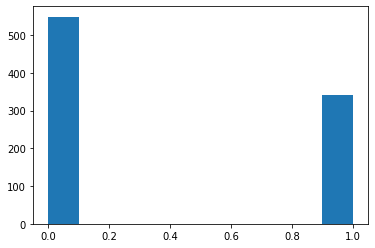

In [9]:
plt.hist(Train["Survived"])

### Pré-processamento dos Dados

Nesta seção procederemos com o tratamento dos dados. Por tratar-se de uma competição do Kaggle, utilizaremos apenas os dados que possam ser validados por uma função de erro do modelo; isto é, utilizaremos apenas amostras que contenham a variável `Survived`.

In [10]:
# DATA NORMALIZATION

# set categorical to numerical attributes
categorical = Train.copy().drop(numerical_labels, axis=1).drop(["Name", "Ticket"], axis=1)
dummies = pd.get_dummies(categorical)

# drop samples with NaN values
dataset = pd.concat([dummies, Train[numerical_labels]], axis=1).dropna()
X = dataset.copy().drop("Survived", axis=1)
y = dataset["Survived"]

# standardize data
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)

# get 10 folds indexes
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

10

### Construção e Avaliação dos Modelos

In [11]:
# different parameters combinations
parameters = [['l1', 'l2'], [True, False], ['best', 'random'], ['gini', 'entropy']]

for train_index, test_index in skf.split(X_scaled, y):
  # current K-Fold sets
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  for i in range(2):
    for j in range(2):
      # Logistic Regression
      logreg = LogisticRegression(solver='liblinear',max_iter=9999, random_state=17, penalty=parameters[0][i])
      logreg.fit(X_train, y_train)
      logreg_preds = logreg.predict(X_test)
      print("---------------------------------------------")
      print("Logistic Regression\n[+] Parameters:")
      print("penalty=",parameters[0][i]) # l1 or l2 penalty
      print("fit_intercept=",parameters[1][i]) # bias existence
      print("\n[+] Metrics:")
      print("Accuracy: ", sk.metrics.accuracy_score(y_test, logreg_preds) *100, " %")
      print("Average Precision Score: ", sk.metrics.average_precision_score(y_test, logreg_preds))
      
      # Decision Tree
      dectree = DecisionTreeClassifier(random_state=17, splitter=parameters[2][j])
      dectree.fit(X_train, y_train)
      dectree_preds = dectree.predict(X_test)
      print("\n\nDecision Tree\n[+] Parameters:")
      print("splitter=",parameters[2][j]) # best split or random best split
      print("criterion=",parameters[3][j]) # gini or entropy criterion
      print("\n[+] Metrics:")
      print("Accuracy: ", sk.metrics.accuracy_score(y_test, logreg_preds) *100, " %")
      print("Average Precision Score: ", sk.metrics.average_precision_score(y_test, dectree_preds), "")

---------------------------------------------
Logistic Regression
[+] Parameters:
penalty= l1
fit_intercept= True

[+] Metrics:
Accuracy:  76.38888888888889  %
Average Precision Score:  0.6176108374384237


Decision Tree
[+] Parameters:
splitter= best
criterion= gini

[+] Metrics:
Accuracy:  76.38888888888889  %
Average Precision Score:  0.47867816091954024 
---------------------------------------------
Logistic Regression
[+] Parameters:
penalty= l1
fit_intercept= True

[+] Metrics:
Accuracy:  76.38888888888889  %
Average Precision Score:  0.6176108374384237


Decision Tree
[+] Parameters:
splitter= random
criterion= entropy

[+] Metrics:
Accuracy:  76.38888888888889  %
Average Precision Score:  0.5863266283524905 
---------------------------------------------
Logistic Regression
[+] Parameters:
penalty= l2
fit_intercept= False

[+] Metrics:
Accuracy:  76.38888888888889  %
Average Precision Score:  0.6176687297376953


Decision Tree
[+] Parameters:
splitter= best
criterion= gini

[+] 

Como mostram os resultados, o modelo que obteve melhores métricas foi o de Árvore de Decisão, com parâmetros `splitter='random'` e `criterion='entropy'`.

# Questão `II`
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### Aquisição e Análise Exploratória dos Dados

In [12]:
Train = pd.read_csv("https://raw.githubusercontent.com/J0AZZ/artificial-intelligence_studies/master/IAIA-UFPB/Prova%202/train2.csv")

In [13]:
Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
numerical_labels = Train.describe().columns
Train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64


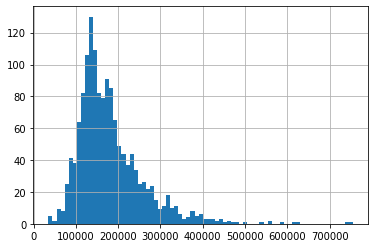

In [16]:
# correlation analysis
correlation = Train.corr()["SalePrice"]

# get relevant features
relevant_corr = correlation[abs(correlation) > 0.5]
relevant = relevant_corr.keys()
print(relevant_corr) # these are the relevant labels

# target histogram
Train["SalePrice"].hist(bins=75)

### Pré-processamento dos Dados

In [17]:
# we already have the numerical features
numerical = Train[relevant]

# take only the most relevant categorical features
Categorical = Train.copy().drop(numerical_labels, axis=1)
categorical = Categorical[["MSZoning", "LandSlope", "Condition1", "Condition2", "ExterQual", "ExterCond"]]

# categorical to numerical representation
dummies = pd.get_dummies(categorical)

# standardize features 
dataset = pd.concat([numerical, dummies], axis=1)
dataset.drop(dataset.isna().index, axis=0)
# split target and attributes
X = dataset.copy().drop("SalePrice", axis=1)
y = dataset["SalePrice"].copy().fillna(value=163000) # fill NaN prices with the median
# standardization
X_scaled = sk.preprocessing.normalize(scaler.fit(X).transform(X), axis=0)
y_scaled = scaler.fit(np.array(y).reshape(-1,1)).transform(np.array(y).reshape(-1,1))

# get 10 folds indexes (stratified k-fold can only be used in classification problems)
kf = KFold(n_splits=10)
kf.get_n_splits(X, y)

10

### Construção e Avaliação dos Modelos

In [18]:
parameters = [[0.5, 0.7, 1], ['mse', 'mae', "friedman_mse"]]

for train_index, test_index in kf.split(X_scaled, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  for i in range(3):
    elanet = ElasticNet(alpha=parameters[0][i], random_state=17).fit(X_train, y_train)
    dectree = DecisionTreeRegressor(criterion=parameters[1][i], random_state=17).fit(X_train, y_train)
    elanet_preds = elanet.predict(X_test)
    dectree_preds = dectree.predict(X_test)

    print("\nElastic Net")
    print("alpha=",parameters[0][i])
    print("Root Mean Squared Error: ", np.sqrt(sk.metrics.mean_squared_error(y_test, elanet_preds)))
    print("\nDecision Tree Regressor")
    print("criterion=", parameters[1][i])
    print("Root Mean Squared Error: ", np.sqrt(sk.metrics.mean_squared_error(y_test, dectree_preds)))
    print("---------------------------------------------")



Elastic Net
alpha= 0.5
Root Mean Squared Error:  28183.516278979787

Decision Tree Regressor
criterion= mse
Root Mean Squared Error:  40459.49985208445
---------------------------------------------

Elastic Net
alpha= 0.7
Root Mean Squared Error:  28427.173700378906

Decision Tree Regressor
criterion= mae
Root Mean Squared Error:  38569.33338567142
---------------------------------------------

Elastic Net
alpha= 1
Root Mean Squared Error:  28746.04367179864

Decision Tree Regressor
criterion= friedman_mse
Root Mean Squared Error:  40459.49985208445
---------------------------------------------

Elastic Net
alpha= 0.5
Root Mean Squared Error:  32659.84563339252

Decision Tree Regressor
criterion= mse
Root Mean Squared Error:  42641.045507017145
---------------------------------------------

Elastic Net
alpha= 0.7
Root Mean Squared Error:  33070.84685295702

Decision Tree Regressor
criterion= mae
Root Mean Squared Error:  45689.918234035795
---------------------------------------------

Como pode-se observar, o menor valor para a métrica RMSE foi obtido pelo modelo composto por uma Árvore de Decisão.

# Questão `III`
https://www.kaggle.com/thesiff/premierleague1819

### Aquisição e Análise Exploratória dos Dados

In [19]:
Train = pd.read_csv("https://raw.githubusercontent.com/J0AZZ/artificial-intelligence_studies/master/IAIA-UFPB/Prova%202/epl_1819.csv")
Train.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


In [20]:
print("Shape: ", Train.shape, "\n\n", Train.info())
stats = Train.describe()
numerical_labels = stats.columns
stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes_through,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
count,20.00000,20.000000,2.000000e+01,20.0,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,17.100000,1.228004e+08,38.0,15.450000,7.10000,15.450000,53.600000,53.600000,0.000000,53.450000,25.250000,27.490000,17.450000,3.750362e+08,1.498508e+07,58.700000,666.650000,195.350000,481.650000,165.550000,9.300000,4.200000,46.400000,7.250000,61.100000,2.350000,3.350000,1.150000,111.950000,127.750000,429.300000,646.250000,3.200000,429.400000,5.350000,49.995000,78.310000
std,5.91608,6.734827,1.821686e+07,0.0,7.250953,2.44734,6.778255,18.071204,15.752694,32.371202,21.007455,1.802776,0.938588,4.071402,2.821444e+08,1.127381e+07,33.625022,75.524325,34.776391,78.333481,39.323858,3.934998,2.546411,16.044018,4.165965,10.557611,1.424411,2.433862,1.136708,24.267099,37.160923,71.058982,65.310493,1.880649,84.536756,2.109502,6.387692,5.866129
min,1.00000,10.000000,9.662886e+07,38.0,3.000000,2.00000,1.000000,22.000000,22.000000,-54.000000,16.000000,20.000000,26.100000,10.000000,8.549200e+07,3.053600e+06,15.000000,562.000000,140.000000,360.000000,108.000000,4.000000,1.000000,17.000000,1.000000,38.000000,0.000000,0.000000,0.000000,58.000000,63.000000,314.000000,518.000000,0.000000,246.000000,1.000000,39.100000,63.900000
25%,5.75000,11.750000,1.069409e+08,38.0,10.750000,6.75000,12.250000,44.250000,46.000000,-20.750000,39.750000,25.000000,26.800000,15.500000,1.723480e+08,6.747400e+06,34.500000,612.500000,174.750000,440.000000,145.000000,6.500000,2.000000,38.500000,4.750000,55.750000,1.000000,1.000000,0.000000,94.750000,108.000000,364.250000,604.500000,2.000000,390.250000,4.750000,46.300000,75.550000
50%,10.50000,15.000000,1.213295e+08,38.0,14.500000,7.00000,16.000000,51.500000,53.500000,-2.500000,51.000000,25.500000,27.250000,18.000000,2.317260e+08,9.935200e+06,50.500000,640.500000,193.500000,472.000000,159.500000,9.500000,4.000000,44.000000,7.000000,59.500000,2.000000,3.000000,1.000000,113.500000,132.000000,434.500000,655.000000,3.500000,445.000000,5.000000,48.350000,78.150000
75%,15.25000,25.000000,1.422731e+08,38.0,19.500000,9.00000,19.250000,63.500000,65.750000,13.750000,67.000000,26.000000,28.150000,20.000000,5.882800e+08,2.326060e+07,78.000000,713.500000,209.250000,517.750000,185.250000,12.000000,5.000000,53.250000,10.000000,71.250000,4.000000,5.000000,2.000000,128.500000,147.250000,472.500000,702.500000,4.000000,499.250000,7.000000,54.000000,82.525000
max,20.00000,29.000000,1.524251e+08,38.0,32.000000,12.00000,28.000000,95.000000,81.000000,72.000000,98.000000,28.000000,29.700000,27.000000,1.003200e+09,3.998720e+07,146.000000,814.000000,298.000000,683.000000,260.000000,19.000000,10.000000,84.000000,15.000000,77.000000,5.000000,9.000000,3.000000,148.000000,222.000000,548.000000,730.000000,8.000000,564.000000,10.000000,64.000000,89.000000


In [21]:
# take relevant attributes
relevant_corr = Train.corr()[abs(Train.corr()["general_league_position"]) > 0.7]["general_league_position"]
relevant_corr

general_league_position          1.000000
finance _live_games_televised   -0.854654
finance _tv_revenue             -0.976656
general_won                     -0.940436
general_lost                     0.944333
attack_scored                   -0.900407
defence_goals_conceeded          0.906426
general_goal_difference         -0.943743
general_points                  -0.953902
finance _team_market            -0.914043
finance _market_average         -0.914010
attack_passes_through           -0.803781
attack_corners_taken            -0.795460
attack_shots                    -0.812425
attack_shots_on_target          -0.840569
attack_goals_box                -0.879432
defence_blocks                   0.703480
attack_posession                -0.849220
attack_pass_accuracy            -0.779514
Name: general_league_position, dtype: float64

count    20.00000
mean     10.50000
std       5.91608
min       1.00000
25%       5.75000
50%      10.50000
75%      15.25000
max      20.00000
Name: general_league_position, dtype: float64


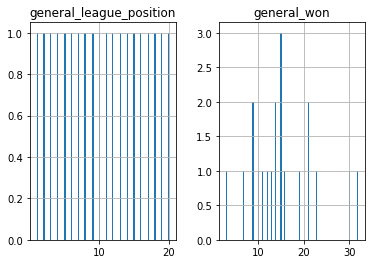

In [22]:
# here we can take a look at the distribution of some important variables
Train[["general_league_position","general_won"]].hist(bins=100)
# we can see that general_league_position assumes a uniform distribution, 
# it's mean is equal to it's median, and, finally,
# that general_won tends to a normal distribution
print(Train["general_league_position"].describe())


### Pré-processamento dos Dados

In [23]:
# function for cleaning integers represented with comma
def remove_comma(nan):
  n = ''
  for c in nan:
    if (c == ','):
      pass
    else:
      n += c
  return n

remove_comma('1,11,0')
# it is better to perform str to int conversion with pandas methods

'1110'

In [24]:
# take variables that must be numbers but are represented as strings
haphazard_numeric = Train.copy().drop(numerical_labels, axis=1).drop(["Team", "category"], axis=1)
no_comma = []
for col in haphazard_numeric:
  no_comma.append(pd.DataFrame([remove_comma(haphazard_numeric[col][i]) for i in range(20)]))

# make new dataframe
integers = pd.concat(no_comma, axis=1)
integers.columns = ["attack_passes", "attack_passes_long", "attack_passes_back", "defence_clearances"]

# our dataset is composed from the most correlated variables with respect to general_league_position
dataset = pd.concat([integers, Train[relevant_corr.keys()]], axis=1)
X = dataset.copy()
y = Train["category"]

### Construção e Avaliação dos Modelos

In [26]:
# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# 5 different values for k
for k in [2, 3, 4, 5, 6]:
  # K Means
  kmeans = KMeans(n_clusters=k, random_state=17).fit(X_train, y_train)
  kmeans_preds = kmeans.predict(X_test)
  print("K Médias\nk=", k)
  print("Homogeneity Score=", sk.metrics.homogeneity_score(y_test, kmeans_preds))
  print("Completeness Score =", sk.metrics.completeness_score(y_test, kmeans_preds))

  # Hierarchical Clustering
  for linkage in ['complete', 'single']:
    hierarch = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    hierarch_preds = hierarch.fit_predict(X_test)
    print("\nAgrupamento Hierárquico\nlinkage=", linkage, "\nk=",k)
    print("Homogeneity Score =", sk.metrics.homogeneity_score(y_test, hierarch_preds))
    print("Completeness Score =", sk.metrics.completeness_score(y_test, hierarch_preds))
  print("---------------------------------------")

K Médias
k= 2
Homogeneity Score= 1.0
Completeness Score = 1.0

Agrupamento Hierárquico
linkage= complete 
k= 2
Homogeneity Score = 1.0
Completeness Score = 1.0

Agrupamento Hierárquico
linkage= single 
k= 2
Homogeneity Score = 1.0
Completeness Score = 1.0
---------------------------------------
K Médias
k= 3
Homogeneity Score= 1.0
Completeness Score = 1.0

Agrupamento Hierárquico
linkage= complete 
k= 3
Homogeneity Score = 1.0000000000000002
Completeness Score = 0.5193410625009365

Agrupamento Hierárquico
linkage= single 
k= 3
Homogeneity Score = 1.0000000000000002
Completeness Score = 0.5193410625009365
---------------------------------------
K Médias
k= 4
Homogeneity Score= 1.0
Completeness Score = 1.0

Agrupamento Hierárquico
linkage= complete 
k= 4
Homogeneity Score = 0.9999999999999998
Completeness Score = 0.33885410691555

Agrupamento Hierárquico
linkage= single 
k= 4
Homogeneity Score = 1.0000000000000002
Completeness Score = 0.3626383380677455
----------------------------------